# Predicting Weather using Logistic Regression

Predicting Weather(rain or snow) by using logistic regression. For the same weatherHistory dataset used which is downloaded from kaggle.(https://www.kaggle.com/datasets/muthuj7/weather-dataset).

We divided work in following parts:

1.Importing dependencies and Load data

2.Exploratory Data Analysis(EDA)

3.Model Creation

4.Model Evaluation

In [108]:
#1.Importing dependencies and Load data
# Importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

In [113]:
# Loading dataset

data=pd.read_csv('weatherHistory.csv')
data.head(4)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.


In [114]:
#2. Exploratory Data Analysis
# drop Formatted Date feature
data=data.drop('Formatted Date',axis=1)
data.head(3)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


In [115]:
#rows and columns

data.shape

(96453, 11)

In [116]:
# Data types

data.dtypes

Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [117]:
# Columns

data.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [118]:
# Checking value counts pf Precip Type feature

data['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [120]:
# Checking value counts Summary feature

data['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [121]:
# # Checking value counts pf Daily Summary feature

data['Daily Summary'].value_counts()

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

In [12]:
# Null values

data.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [122]:
# drop- Daily Summary feature

data=data.drop('Daily Summary',axis=1)
data.head(3)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94


In [123]:
# Null value handled

data['Precip Type']=data['Precip Type'].fillna(data['Precip Type'].mode()[0])

In [124]:
data.isnull().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [125]:
# Statistical Information

data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [126]:
# Dataset Information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               96453 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
dtypes: float64(8), object(2)
memory usage: 7.4+ MB


<AxesSubplot:>

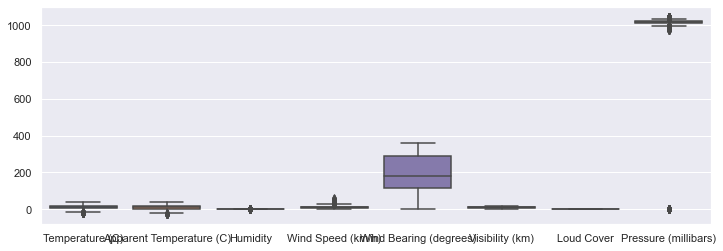

In [127]:
#outlier Detection

sns.set(rc={"figure.figsize":(12,4)})
sns.boxplot(data=data)

In [130]:
#outlier removal of Pressure (millibars) feature

q1=data['Pressure (millibars)'].quantile(0.25)
q3=data['Pressure (millibars)'].quantile(0.75)
q2=q3-q1
lo=q1-1.5*q2
up=q3+1.5*q2
data1=data[~((data['Pressure (millibars)']>up)|(data['Pressure (millibars)']<lo))]
data1.head(2)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63


<AxesSubplot:>

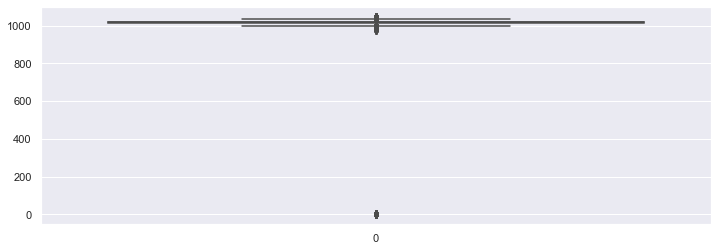

In [131]:
sns.boxplot(data=data['Pressure (millibars)'])

In [132]:
# outlier removal of Wind Speed (km/h) feature

Q1=data1['Wind Speed (km/h)'].quantile(0.25)
Q3=data1['Wind Speed (km/h)'].quantile(0.75)
Q2=Q3-Q1
lo1=Q1-1.5*Q2
up1=Q3+1.5*Q2
data2=data1[~((data1['Wind Speed (km/h)']>up1)|(data1['Wind Speed (km/h)']<lo1))]
data2.head(2)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63


<AxesSubplot:>

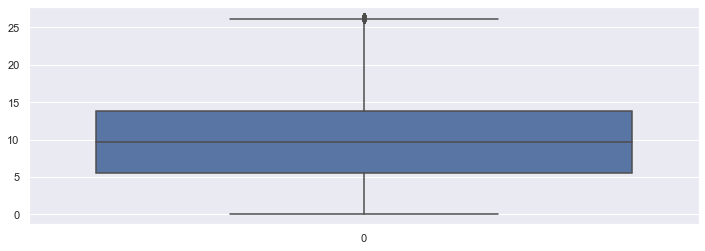

In [133]:
sns.boxplot(data=data2['Wind Speed (km/h)'])

In [136]:
# outlier removal of Apparent Temperature (C) feature

q11=data2['Apparent Temperature (C)'].quantile(0.25)
q33=data2['Apparent Temperature (C)'].quantile(0.75)
q22=q33-q11
low=q11-1.5*q33
upp=q33+1.5*q33
data3=data2[~((data2['Apparent Temperature (C)']>upp)|(data2['Apparent Temperature (C)']<low))]
data3.head(3)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94


<AxesSubplot:>

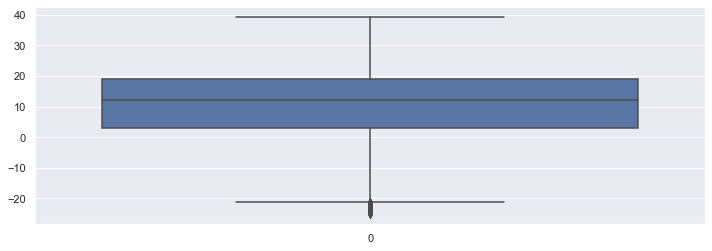

In [137]:
sns.boxplot(data=data3['Apparent Temperature (C)'])

In [139]:
# Encoding using label encoder

obj=LabelEncoder()
data3['Summary']=obj.fit_transform(data3['Summary'])
data3['Precip Type']=obj.fit_transform(data3['Precip Type'])
data3.head(3)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,12,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,12,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,10,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94


In [140]:
# drop - Loud Cover feature

data3=data3.drop('Loud Cover',axis=1)

<AxesSubplot:>

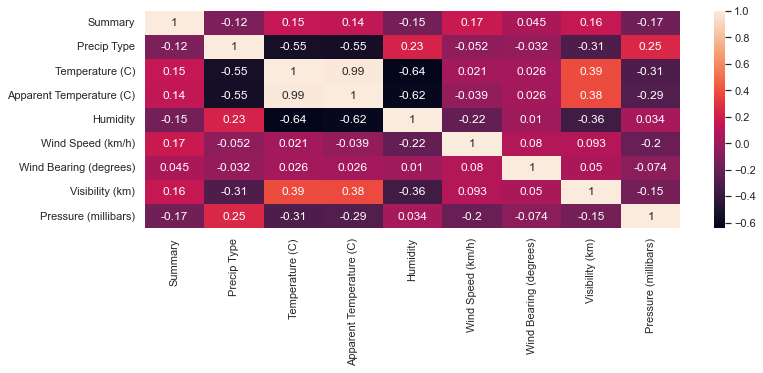

In [141]:
# Data Correlation using heatmap

sns.heatmap(data3.corr(),annot=True)

In [142]:
# X-independent varaible
# y-dependent variable

X=data3.drop(['Wind Speed (km/h)','Wind Bearing (degrees)','Precip Type'],axis=1)
y=data3['Precip Type']

In [143]:
# Balancing data using Under Sampling method

obj1=RandomUnderSampler(sampling_strategy=0.7)
X1,y1=obj1.fit_resample(X,y)

In [144]:
y1.value_counts()

0    12877
1     9014
Name: Precip Type, dtype: int64

In [145]:
# 3 Model Creation
# splitting data into X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,random_state=2)
print('X_train:',np.shape(X_train))
print('X_test:',np.shape(X_test))
print('y_train:',np.shape(y_train))
print('y_test:',np.shape(y_test))

X_train: (15323, 6)
X_test: (6568, 6)
y_train: (15323,)
y_test: (6568,)


In [146]:
# Model fitting

lr=LogisticRegression()
model=lr.fit(X_train,y_train)

In [147]:
# model predication for testing data

y_pred=model.predict(X_test)

In [148]:
# model predication for training data

y_pred_train=model.predict(X_train)

In [149]:
# Checking result 

result=model.predict([[5,-1.344444,-1.344444,0.97,0.5796,1029.40]])
if result==0:
    print('Predication:  Rain')
else:
    print('Predication:  Snow')

Predication:  Snow


In [150]:
# 4. Model Evaluation
# Confusion Matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[3795,   30],
       [   0, 2743]], dtype=int64)

In [151]:
# Values

TP=cm[0][0]
FP=cm[1][0]
TN=cm[1][1]
FN=cm[0][1]
print('TP:',TP)
print('FP:',FP)
print('TN:',TN)
print('FN:',FN)

TP: 3795
FP: 0
TN: 2743
FN: 30


In [152]:
# Accuracy,Precision,Recall,z-score values

P=TP/(TP+FP)
R=TP/(TP+FN)
print("Accuracy:",(TP+TN)/(TP+TN+FP+FN))
print("Precision:",P)
print("Recall:",R)
print("Z-score:",2*((P*R)/(P+R)))

Accuracy: 0.9954323995127893
Precision: 1.0
Recall: 0.9921568627450981
Z-score: 0.9960629921259843


In [153]:
# Report: Testing data

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3825
           1       0.99      1.00      0.99      2743

    accuracy                           1.00      6568
   macro avg       0.99      1.00      1.00      6568
weighted avg       1.00      1.00      1.00      6568



In [154]:
# Report: Training Data

print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      9052
           1       0.99      1.00      0.99      6271

    accuracy                           0.99     15323
   macro avg       0.99      1.00      0.99     15323
weighted avg       0.99      0.99      0.99     15323

